In [10]:
import datetime as dt
from salishsea_tools import geo_tools, evaltools
import glob
import pandas as pd
import numpy as np
import pytz
import netCDF4 as nc
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
nutrients_2015 = pd.read_csv(
    '/ocean/eolson/MEOPAR/obs/PSFCitSci/PSFbottledata2015_CN_edits_EOCor2.csv')

In [3]:
data=nutrients_2015.loc[pd.notnull(nutrients_2015['date'])&
                        pd.notnull(nutrients_2015['Time'])&
                        pd.notnull(nutrients_2015['lat'])&
                        pd.notnull(nutrients_2015['lon'])].copy(deep=True)
data['Lat']=data['lat']
data['Lon']=data['lon']
data['Z']=data['depth']

In [4]:
ts=data['Time'].values
ds=data['date'].values
dts=[pytz.timezone('Canada/Pacific').localize(dt.datetime.strptime(ii+' '+jj,'%d-%m-%Y %I:%M:%S %p')).astimezone(pytz.utc).replace(tzinfo=None)
    for ii,jj in zip(ds,ts)]

In [5]:
data['dtUTC']=dts

In [6]:
start=dt.datetime(2015,2,6)
end=dt.datetime(2015,3,18)
basedir='/data/eolson/MEOPAR/SS36runs/CedarRuns/spring2015_A3Base/'
nam_fmt='long'
flen=10
#map each variable to extract from model to a data variable name and to a file type
varmap={'no23':'nitrate','si':'silicon'}
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T'}
fdict={'ptrc_T':1,'grid_T':1}

In [7]:
newdata,varmap=evaltools.matchData(data, varmap, filemap, fdict, start, end, nam_fmt, basedir, flen)

In [8]:
varmap

{'no23': 'nitrate', 'si': 'silicon'}

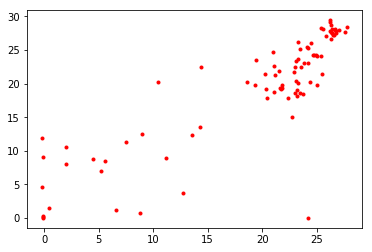

In [11]:
plt.plot(newdata['no23'],newdata['mod_nitrate'],'r.')